<a href="https://colab.research.google.com/github/OmdenaAI/Algeria-Chapter-Green/blob/main/Team-1_Water-Level-Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Water Level Forecasting

## Problem Statement
### Objective
Venezia is an Italian city built on a lagoon, a body of water separated from the sea by a strip of land. However, this city is frequently subject to flooding during autumn and spring due to the "acqua alta", a tide that raises the water level to the point that the sea invades the city. 
This phenomenon causes great complications in the city. The forecast of the water level is therefore a fundamental task for the safeguard of the city of Venezia.

### Dataset & Data Description
The dataset contains hourly measurements of the water level in Venezia from 1983-01-01 to 2016-01-01.


To load the dataset, use the following link: https://www.kaggle.com/datasets/lbronchal/venezia


#### Data Description:

Attribute Information:

* datetime: date and hour of the measurement in utc time
* level: level of the water in cm from the reference point

## Solution steps:
1. Load data
2. EDA implementation
3. Data Processing & Transformation 
4. Preparation of Train, Valid and Test datasets
5. Build, Train & Evaluate the model
 


### **Load Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_datareader as pdr
from datetime import datetime
from pandas import DataFrame
from pandas import concat
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.layers import LSTM ,Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.models import Sequential
from sklearn.metrics import mean_squared_error
from sklearn import metrics  

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Load Data**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/venezia.csv')

In [ ]:
data.head()

,datetime,level
0,1983-01-01 01:00:00,44.0
1,1983-01-01 02:00:00,35.0
2,1983-01-01 03:00:00,23.0
3,1983-01-01 04:00:00,10.0
4,1983-01-01 05:00:00,1.0


In [ ]:
data.shape

(289272, 2)

### **Exploratory Data Analysis** 

In [ ]:
print("Start: ", data['datetime'].min())
print("End: ", data['datetime'].max())

Start:  1983-01-01 01:00:00
End:  2016-01-01 00:00:00


In [ ]:
data[['date', 'time']] = data['datetime'].str.split(' ', 1, expand=True)

In [ ]:
data.head()

,datetime,level,date,time
0,1983-01-01 01:00:00,44.0,1983-01-01,01:00:00
1,1983-01-01 02:00:00,35.0,1983-01-01,02:00:00
2,1983-01-01 03:00:00,23.0,1983-01-01,03:00:00
3,1983-01-01 04:00:00,10.0,1983-01-01,04:00:00
4,1983-01-01 05:00:00,1.0,1983-01-01,05:00:00


In [ ]:
data = data.drop(labels=['datetime'],axis=1)

In [ ]:
data.head()

,level,date,time
0,44.0,1983-01-01,01:00:00
1,35.0,1983-01-01,02:00:00
2,23.0,1983-01-01,03:00:00
3,10.0,1983-01-01,04:00:00
4,1.0,1983-01-01,05:00:00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289272 entries, 0 to 289271
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   level   289272 non-null  float64
 1   date    289272 non-null  object 
 2   time    289272 non-null  object 
dtypes: float64(1), object(2)
memory usage: 6.6+ MB


In [ ]:
data.describe()

,level
count,289272.000000
mean,25.883449
std,29.130133
min,-92.000000
25%,6.000000
50%,27.000000
75%,47.000000
max,159.000000


In [ ]:
data.isnull().sum()

level    0
date     0
time     0
dtype: int64

In [ ]:
data['date'] = pd.to_datetime(data['date'])

In [ ]:
data['time'] = pd.to_datetime(data['time'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289272 entries, 0 to 289271
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   level   289272 non-null  float64       
 1   date    289272 non-null  datetime64[ns]
 2   time    289272 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1)
memory usage: 6.6 MB


In [ ]:
data.head()

,level,date,time
0,44.0,1983-01-01,2022-09-27 01:00:00
1,35.0,1983-01-01,2022-09-27 02:00:00
2,23.0,1983-01-01,2022-09-27 03:00:00
3,10.0,1983-01-01,2022-09-27 04:00:00
4,1.0,1983-01-01,2022-09-27 05:00:00


In [ ]:
# Not converting into seperate columns
df = pd.read_csv('/content/drive/MyDrive/venezia.csv')

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289272 entries, 0 to 289271
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   datetime  289272 non-null  datetime64[ns]
 1   level     289272 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.4 MB


In [ ]:
df.head()

,datetime,level
0,1983-01-01 01:00:00,44.0
1,1983-01-01 02:00:00,35.0
2,1983-01-01 03:00:00,23.0
3,1983-01-01 04:00:00,10.0
4,1983-01-01 05:00:00,1.0


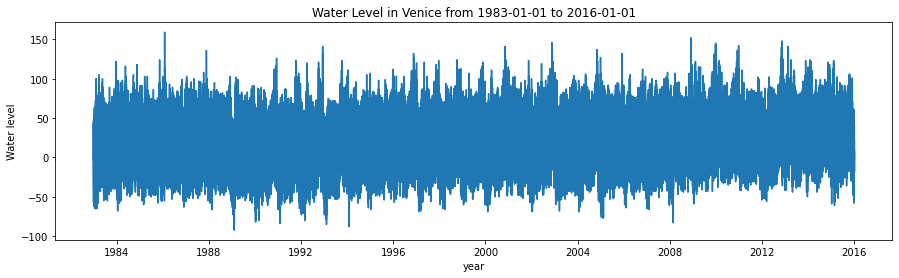

In [ ]:
plt.figure(figsize=(15,4))
plt.plot(df['datetime'],df['level'])
plt.gca().set(title='Water Level in Venice from 1983-01-01 to 2016-01-01', xlabel='year', ylabel='Water level')
plt.show()

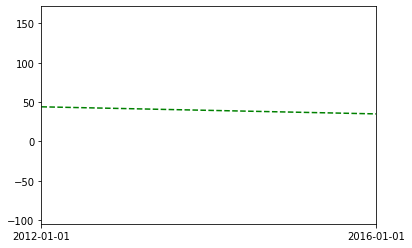

In [ ]:
df['level'].plot(xlim=['2012-01-01','2016-01-01'],ls='--',c='green')

In [ ]:
df.index

RangeIndex(start=0, stop=289272, step=1)

In [ ]:
datetime.now()

datetime.datetime(2022, 9, 27, 12, 42, 10, 91702)

#Time Resampling

In [ ]:
df.head()

,datetime,level
0,1983-01-01 01:00:00,44.0
1,1983-01-01 02:00:00,35.0
2,1983-01-01 03:00:00,23.0
3,1983-01-01 04:00:00,10.0
4,1983-01-01 05:00:00,1.0


In [ ]:
df = df.set_index('datetime',drop=True)

In [ ]:
#In each year it shows what is the minimum sea level
#Rule A means year and frequency
df.resample(rule='A').min()

,level
datetime,
1983-12-31,-65.0
1984-12-31,-68.0
1985-12-31,-60.0
1986-12-31,-63.0
1987-12-31,-56.0
1988-12-31,-66.0
1989-12-31,-92.0
1990-12-31,-82.0
1991-12-31,-84.0


In [ ]:
#In each year it shows what is the maximum sea level
df.resample(rule='A').max()

,level
datetime,
1983-12-31,122.0
1984-12-31,118.0
1985-12-31,124.0
1986-12-31,159.0
1987-12-31,136.0
1988-12-31,103.0
1989-12-31,102.0
1990-12-31,126.0
1991-12-31,123.0


In [ ]:
df['2015-12-31']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


,level
datetime,
2015-12-31 00:00:00,23.0
2015-12-31 01:00:00,32.0
2015-12-31 02:00:00,39.0
2015-12-31 03:00:00,41.0
2015-12-31 04:00:00,38.0
2015-12-31 05:00:00,28.0
2015-12-31 06:00:00,17.0
2015-12-31 07:00:00,8.0
2015-12-31 08:00:00,2.0


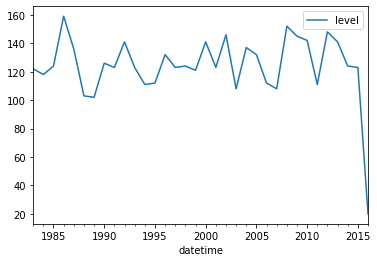

In [ ]:
df.resample(rule='A').max().plot()
#Now we can see the trend of maximum value clearly

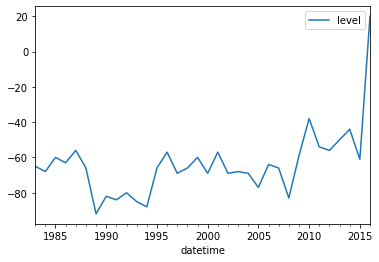

In [ ]:
df.resample(rule='A').min().plot()

In [ ]:
#Quarterly
df.resample(rule='QS').max()

,level
datetime,
1983-01-01,105.0
1983-04-01,100.0
1983-07-01,89.0
1983-10-01,122.0
1984-01-01,98.0
...,...
2015-01-01,123.0
2015-04-01,102.0
2015-07-01,91.0


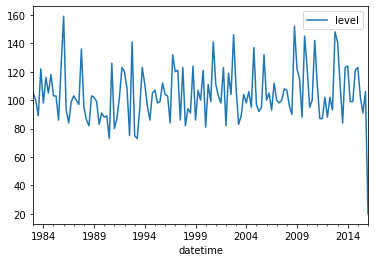

In [ ]:
df.resample(rule='QS').max().plot()

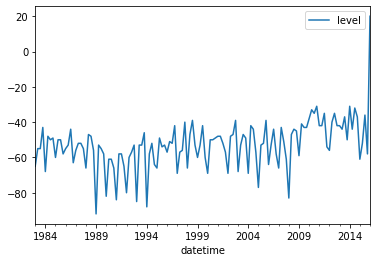

In [ ]:
df.resample(rule='QS').min().plot()

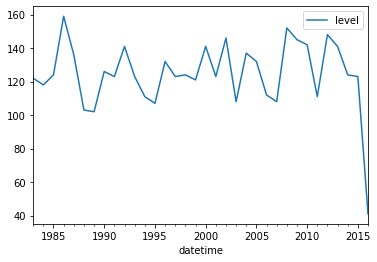

In [ ]:
#Till the last Business day
df.resample(rule='BA').max().plot()

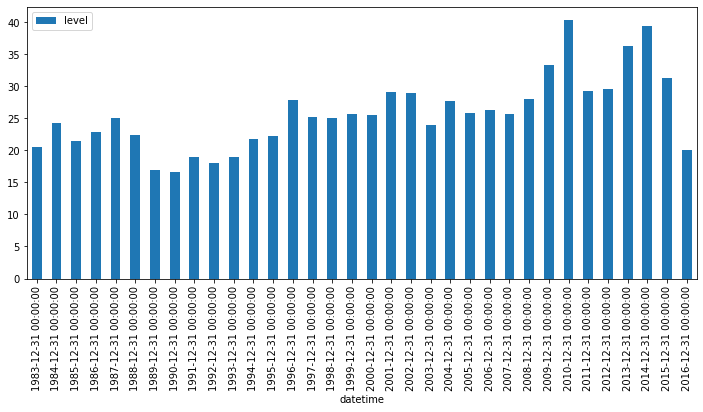

In [ ]:
df.resample(rule='A').mean().plot(kind='bar',figsize=(12,5))

### **Data Processing & Transformation** 

In [ ]:
 #Extracting features from date and time this way creating  new features.
data['Month'] = [i.month for i in data['date']]
data['Year'] = [i.year for i in data['date']]
data['day'] = [i.day for i in data['date']]
data['Hour'] = [i.hour for i in data['time']]
data['Minute'] = [i.minute for i in data['time']]
data['Second'] = [i.second for i in data['time']]
#drop unnecessary  columns and re-arrange
data.drop('Minute',axis=1, inplace=True)
data.drop('Second',axis=1, inplace=True)
data = data[['Year', 'Month', 'day', 'Hour', 'level']]
data

,Year,Month,day,Hour,level
0,1983,1,1,1,44.0
1,1983,1,1,2,35.0
2,1983,1,1,3,23.0
3,1983,1,1,4,10.0
4,1983,1,1,5,1.0
...,...,...,...,...,...
289267,2015,12,31,20,-18.0
289268,2015,12,31,21,-14.0
289269,2015,12,31,22,-5.0
289270,2015,12,31,23,8.0


We consider water level forecasting as a problem in which we try to predict the water level at a specific time in the future.

A simple approach to do this is to use shifted (lagged) values to predict the value at the next time (t+1) given the value at the current time (t).

We used a one-step setup, where the model will learn to predict a single point in the future.

In [ ]:
#create a dataframe that contains water level values at 't'
temps = DataFrame(data['level'].values)
# shift forward and concatenate with data
temps_shift = concat([temps.shift(1, axis = 0),temps], axis=1)
data = concat([data, temps_shift], axis=1)
#drop repeated column
data.drop('level',axis=1, inplace=True)
#re-arrange
data.columns = ['Year', 'Month', 'day', 'Hour','t', 't+1']
#drop the first row with NaN value
data.dropna(axis=0, inplace=True)
data

,Year,Month,day,Hour,t,t+1
1,1983,1,1,2,44.0,35.0
2,1983,1,1,3,35.0,23.0
3,1983,1,1,4,23.0,10.0
4,1983,1,1,5,10.0,1.0
5,1983,1,1,6,1.0,-1.0
...,...,...,...,...,...,...
289267,2015,12,31,20,-19.0,-18.0
289268,2015,12,31,21,-18.0,-14.0
289269,2015,12,31,22,-14.0,-5.0
289270,2015,12,31,23,-5.0,8.0


##Prepare Train/ Valid/ Test Data
1. Spliting train / valid / test datasets

It is important to ensure that the spliting is not done randomly because we want our test data to contain points that are in the future from the points in the train data 

2. Separating the input and output variables


* 5 input variables (input features) :  Year, Month, day, Hour, water level at time 't'.

* Output variable to forecast : water level at time 't+1'.

In [ ]:
train = data[data['Year'] <= 2011]
valid = data[(data['Year'] > 2011) & (data['Year'] < 2015)]
test = data[data['Year'] >= 2015]

In [ ]:
#Separating the input and output variables
train_X = train.iloc[:,:-1]
train_y = train.iloc[:,-1]
valid_X = valid.iloc[:,:-1]
valid_y = valid.iloc[:,-1]
test_X = test.iloc[:,:-1]
test_y = test.iloc[:,-1]

In [ ]:
train_X = train_X.values
print('train_X shape:', train_X.shape)
train_y = train_y.values
print('train_y shape:', train_y.shape)
valid_X = valid_X.values
print('valid_X shape:', valid_X.shape)
valid_y = valid_y.values
print('valid_y shape:', valid_y.shape)
test_X = test_X.values
print('test_X shape:', test_X.shape)
test_y = test_y.values
print('test_y shape:', test_y.shape)

train_X shape: (254206, 5)
train_y shape: (254206,)
valid_X shape: (26304, 5)
valid_y shape: (26304,)
test_X shape: (8761, 5)
test_y shape: (8761,)


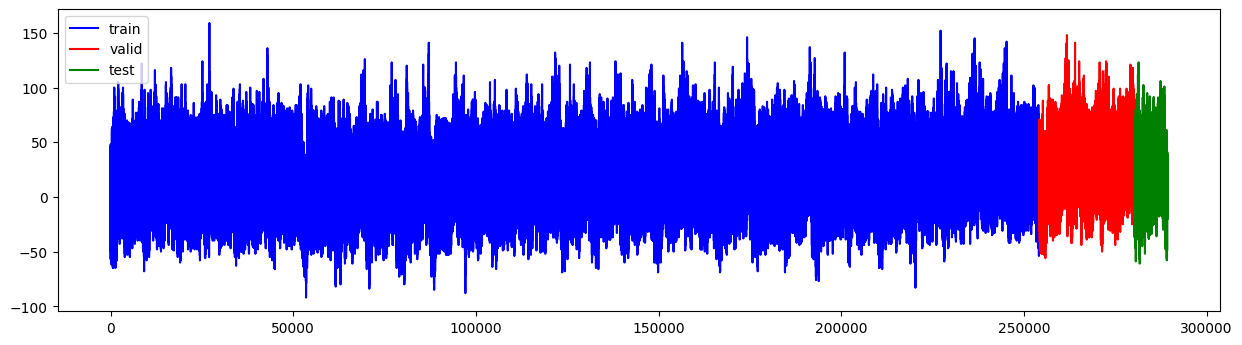

In [ ]:
#plot the distribution of train /valid/ test samples
x1=np.arange(0,254206)
x2 = np.arange(254206,280510)
x3 = np.arange(280510,289271)
plt.figure(figsize=(15,4), dpi=100)
plt.plot(x1,train_y,'b',label='train')
plt.plot(x2, valid_y, 'r', label='valid')
plt.plot(x3,test_y,'g',label='test')

plt.legend(loc='best')

##Model Building

1. Multi Layer Perceptron


Input shape [samples, timesteps].



In [ ]:
model_mlp = Sequential()
model_mlp.add(Dense(100,activation='relu', input_dim=train_X.shape[1]))
model_mlp.add(Dense(50, activation='relu'))
model_mlp.add(Dense(25, activation='relu'))

model_mlp.add(Dense(1))
model_mlp.compile(loss="mse", optimizer="adam")
model_mlp.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               600       
                                                                 
 dense_5 (Dense)             (None, 50)                5050      
                                                                 
 dense_6 (Dense)             (None, 25)                1275      
                                                                 
 dense_7 (Dense)             (None, 1)                 26        
                                                                 
Total params: 6,951
Trainable params: 6,951
Non-trainable params: 0
_________________________________________________________________


In [ ]:
mlp_history = model_mlp.fit(train_X, train_y, validation_data=(valid_X, valid_y), epochs=10, verbose=2)

Epoch 1/10
7944/7944 - 14s - loss: 141.7446 - val_loss: 117.0263 - 14s/epoch - 2ms/step
Epoch 2/10
7944/7944 - 13s - loss: 125.1847 - val_loss: 111.0909 - 13s/epoch - 2ms/step
Epoch 3/10
7944/7944 - 12s - loss: 123.1654 - val_loss: 112.0804 - 12s/epoch - 2ms/step
Epoch 4/10
7944/7944 - 14s - loss: 121.6502 - val_loss: 112.3945 - 14s/epoch - 2ms/step
Epoch 5/10
7944/7944 - 12s - loss: 121.0389 - val_loss: 110.6115 - 12s/epoch - 2ms/step
Epoch 6/10
7944/7944 - 12s - loss: 120.6928 - val_loss: 112.8311 - 12s/epoch - 2ms/step
Epoch 7/10
7944/7944 - 13s - loss: 120.4715 - val_loss: 110.6360 - 13s/epoch - 2ms/step
Epoch 8/10
7944/7944 - 13s - loss: 119.4480 - val_loss: 110.0114 - 13s/epoch - 2ms/step
Epoch 9/10
7944/7944 - 13s - loss: 117.7936 - val_loss: 113.2748 - 13s/epoch - 2ms/step
Epoch 10/10
7944/7944 - 13s - loss: 116.7243 - val_loss: 109.7534 - 13s/epoch - 2ms/step


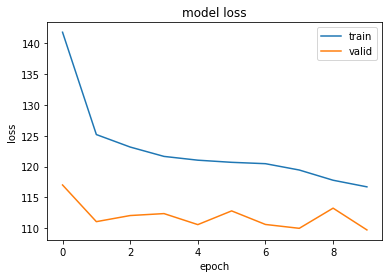

In [ ]:
# summarize history for loss
plt.plot(mlp_history.history['loss'])
plt.plot(mlp_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

In [ ]:
mlp_train_pred = model_mlp.predict(train_X)
mlp_valid_pred = model_mlp.predict(valid_X)
mlp_test_pred = model_mlp.predict(test_X)

print('Train rmse:', np.sqrt(mean_squared_error(train_y ,mlp_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(valid_y, mlp_valid_pred)))
print('Test rmse:', np.sqrt(mean_squared_error(test_y, mlp_test_pred)))
print('Test mae :', metrics.mean_absolute_error(test_y, mlp_test_pred))
print('Test mse :', metrics.mean_squared_error(test_y, mlp_test_pred))


Train rmse: 11.006562615845503
Validation rmse: 10.476324141364685
Test rmse: 10.65545697524028
Test mae : 9.045520179261969
Test mse : 113.53876335119674


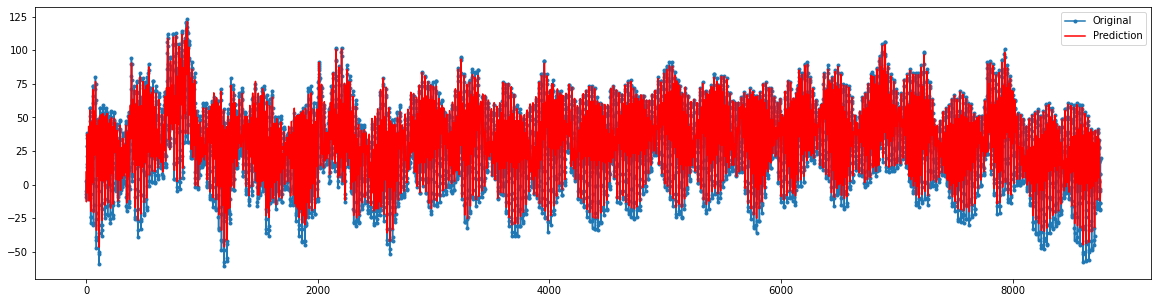

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(test_y, marker = '.', label='Original')
plt.plot(mlp_test_pred, color='red', label='Prediction')
plt.legend()

2. Convolutional Neural Network

Input shape [samples, features, timesteps




In [ ]:
#reshape the train/valid/test datasets as it matche the CNN input
train_Xcnn = train_X.reshape((train_X.shape[0], train_X.shape[1], 1))
valid_Xcnn = valid_X.reshape((valid_X.shape[0], valid_X.shape[1], 1))
test_Xcnn = test_X.reshape((test_X.shape[0], test_X.shape[1], 1))
print('Train set shape', train_Xcnn.shape)
print('Validation set shape', valid_Xcnn.shape)
print('Validation set shape', test_Xcnn.shape)


Train set shape (254206, 5, 1)
Validation set shape (26304, 5, 1)
Validation set shape (8761, 5, 1)


In [ ]:
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(train_Xcnn.shape[1], train_Xcnn.shape[2])))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(50, activation='relu'))
model_cnn.add(Dense(1))
model_cnn.compile(loss="mse", optimizer="adam")

model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 64)             192       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 2, 64)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 50)                6450      
                                                                 
 dense_9 (Dense)             (None, 1)                 51        
                                                                 
Total params: 6,693
Trainable params: 6,693
Non-trainable params: 0
____________________________________________________

In [ ]:
cnn_history = model_cnn.fit(train_Xcnn, train_y, validation_data=(valid_Xcnn, valid_y), epochs=10, verbose=2)


Epoch 1/10
7944/7944 - 13s - loss: 181.4970 - val_loss: 114.9991 - 13s/epoch - 2ms/step
Epoch 2/10
7944/7944 - 12s - loss: 123.7562 - val_loss: 109.5730 - 12s/epoch - 2ms/step
Epoch 3/10
7944/7944 - 12s - loss: 119.5586 - val_loss: 131.6706 - 12s/epoch - 2ms/step
Epoch 4/10
7944/7944 - 12s - loss: 117.2640 - val_loss: 113.3616 - 12s/epoch - 2ms/step
Epoch 5/10
7944/7944 - 12s - loss: 115.6177 - val_loss: 105.9972 - 12s/epoch - 2ms/step
Epoch 6/10
7944/7944 - 12s - loss: 114.2256 - val_loss: 104.8557 - 12s/epoch - 2ms/step
Epoch 7/10
7944/7944 - 12s - loss: 112.6418 - val_loss: 104.3004 - 12s/epoch - 2ms/step
Epoch 8/10
7944/7944 - 13s - loss: 110.3676 - val_loss: 101.4993 - 13s/epoch - 2ms/step
Epoch 9/10
7944/7944 - 12s - loss: 107.4378 - val_loss: 97.9017 - 12s/epoch - 2ms/step
Epoch 10/10
7944/7944 - 12s - loss: 104.9871 - val_loss: 98.2433 - 12s/epoch - 2ms/step


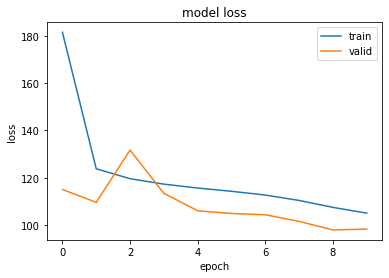

In [ ]:
# summarize history for loss
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

In [ ]:

cnn_train_pred = model_cnn.predict(train_Xcnn)
cnn_valid_pred = model_cnn.predict(valid_Xcnn)
cnn_test_pred = model_cnn.predict(test_Xcnn)

print('Train rmse:', np.sqrt(mean_squared_error(train_y ,cnn_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(valid_y, cnn_valid_pred)))
print('Test rmse:', np.sqrt(mean_squared_error(test_y, cnn_test_pred)))
print('Test mae :', metrics.mean_absolute_error(test_y, cnn_test_pred))
print('Test mse :', metrics.mean_squared_error(test_y, cnn_test_pred))


Train rmse: 10.164073764761131
Validation rmse: 9.911771018666936
Test rmse: 9.997712926271438
Test mae : 8.643688880099328
Test mse : 99.95426375613499


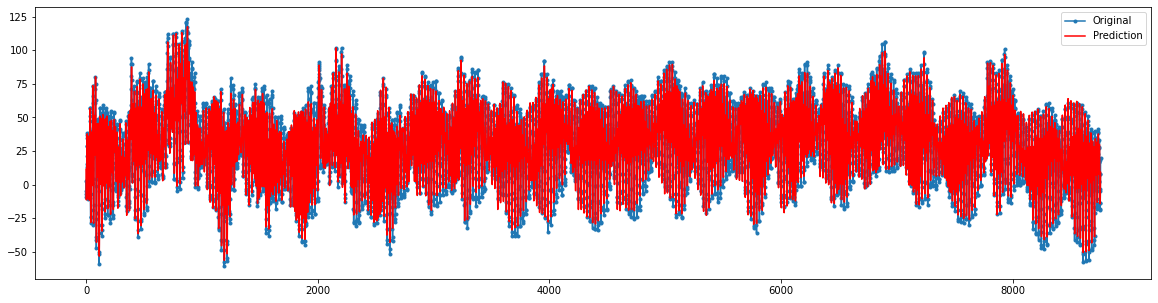

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(test_y, marker = '.', label='Original')
plt.plot(cnn_test_pred, color='red', label='Prediction')
plt.legend()

3. Long Short Term Memory

Input shape [samples, features, timesteps] same as CNN

In [ ]:
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(train_Xcnn.shape[1], train_Xcnn.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(loss="mse", optimizer="adam")
model_lstm.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense_10 (Dense)            (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [ ]:
lstm_history = model_lstm.fit(train_Xcnn, train_y, validation_data=(valid_Xcnn, valid_y), epochs=10, verbose=2)


Epoch 1/10
7944/7944 - 29s - loss: 112.9645 - val_loss: 92.3406 - 29s/epoch - 4ms/step
Epoch 2/10
7944/7944 - 28s - loss: 88.1837 - val_loss: 88.9902 - 28s/epoch - 3ms/step
Epoch 3/10
7944/7944 - 28s - loss: 85.1160 - val_loss: 83.6349 - 28s/epoch - 3ms/step
Epoch 4/10
7944/7944 - 28s - loss: 85.9040 - val_loss: 86.9805 - 28s/epoch - 3ms/step
Epoch 5/10
7944/7944 - 28s - loss: 84.0496 - val_loss: 82.0446 - 28s/epoch - 3ms/step
Epoch 6/10
7944/7944 - 30s - loss: 84.8526 - val_loss: 81.0584 - 30s/epoch - 4ms/step
Epoch 7/10
7944/7944 - 28s - loss: 83.6830 - val_loss: 81.8802 - 28s/epoch - 3ms/step
Epoch 8/10
7944/7944 - 28s - loss: 83.4499 - val_loss: 86.2656 - 28s/epoch - 4ms/step
Epoch 9/10
7944/7944 - 28s - loss: 86.3524 - val_loss: 80.8524 - 28s/epoch - 4ms/step
Epoch 10/10
7944/7944 - 27s - loss: 91.1944 - val_loss: 81.2594 - 27s/epoch - 3ms/step


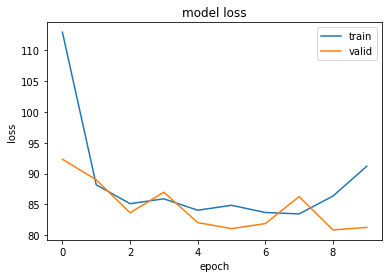

In [ ]:
# summarize history for loss
plt.plot(lstm_history.history['loss'])
plt.plot(lstm_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

In [ ]:
lstm_train_pred = model_lstm.predict(train_Xcnn)
lstm_valid_pred = model_lstm.predict(valid_Xcnn)
lstm_test_pred = model_lstm.predict(test_Xcnn)

print('Train rmse:', np.sqrt(mean_squared_error(train_y ,lstm_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(valid_y, lstm_valid_pred)))
print('Test rmse:', np.sqrt(mean_squared_error(test_y, lstm_test_pred)))
print('Test mae :', metrics.mean_absolute_error(test_y, lstm_test_pred))
print('Test mse :', metrics.mean_squared_error(test_y, lstm_test_pred))

Train rmse: 9.096334092688624
Validation rmse: 9.01440165055327
Test rmse: 9.073652102163127
Test mae : 7.9750528086430545
Test mse : 82.33116247108933


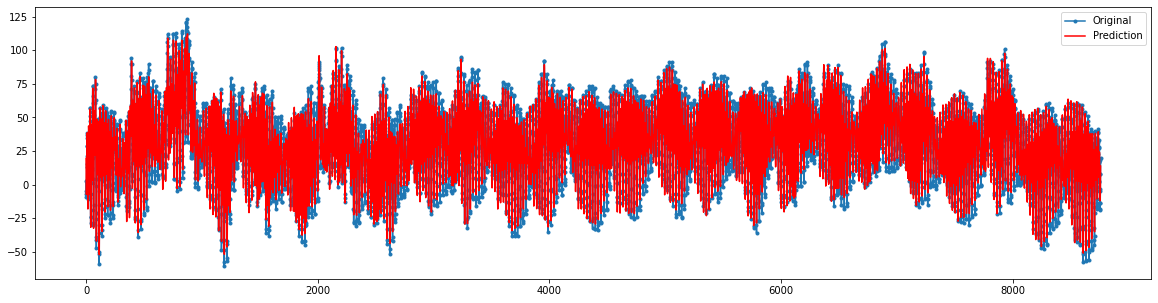

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(test_y, marker = '.', label='Original')
plt.plot(lstm_test_pred, color='red', label='Prediction')
plt.legend()

##CNN-LSTM

In [ ]:
model_cnn_lstm = Sequential()
model_cnn_lstm.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape= (train_Xcnn.shape[1], train_Xcnn.shape[2])))
model_cnn_lstm.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model_cnn_lstm.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model_cnn_lstm.add(MaxPooling1D(pool_size=2))
model_cnn_lstm.add(LSTM(50, activation='relu', return_sequences=True))
model_cnn_lstm.add(Flatten())
model_cnn_lstm.add(Dense(100, activation='relu'))
model_cnn_lstm.add(Dense(1))
model_cnn_lstm.compile(loss="mse", optimizer="adam")

model_cnn_lstm.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 4, 128)            384       
                                                                 
 conv1d_2 (Conv1D)           (None, 3, 128)            32896     
                                                                 
 conv1d_3 (Conv1D)           (None, 2, 128)            32896     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 1, 128)           0         
 1D)                                                             
                                                                 
 lstm_1 (LSTM)               (None, 1, 50)             35800     
                                                                 
 flatten_1 (Flatten)         (None, 50)                0         
                                                      

In [ ]:
cnn_lstm_history = model_cnn_lstm.fit(train_Xcnn, train_y, validation_data=(valid_Xcnn, valid_y), epochs=10, verbose=2)


Epoch 1/10
7944/7944 - 43s - loss: 116.4069 - val_loss: 91.2108 - 43s/epoch - 5ms/step
Epoch 2/10
7944/7944 - 41s - loss: 92.6342 - val_loss: 85.2645 - 41s/epoch - 5ms/step
Epoch 3/10
7944/7944 - 41s - loss: 88.8868 - val_loss: 88.4679 - 41s/epoch - 5ms/step
Epoch 4/10
7944/7944 - 39s - loss: 87.1106 - val_loss: 83.7905 - 39s/epoch - 5ms/step
Epoch 5/10
7944/7944 - 40s - loss: 86.3260 - val_loss: 87.2801 - 40s/epoch - 5ms/step
Epoch 6/10
7944/7944 - 40s - loss: 85.7240 - val_loss: 84.7686 - 40s/epoch - 5ms/step
Epoch 7/10
7944/7944 - 39s - loss: 85.4565 - val_loss: 81.9268 - 39s/epoch - 5ms/step
Epoch 8/10
7944/7944 - 41s - loss: 84.9557 - val_loss: 83.4241 - 41s/epoch - 5ms/step
Epoch 9/10
7944/7944 - 39s - loss: 84.6240 - val_loss: 83.1117 - 39s/epoch - 5ms/step
Epoch 10/10
7944/7944 - 42s - loss: 84.4436 - val_loss: 83.2710 - 42s/epoch - 5ms/step


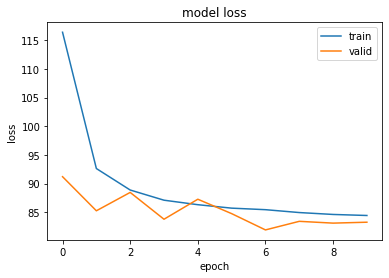

In [ ]:
# summarize history for loss
plt.plot(cnn_lstm_history.history['loss'])
plt.plot(cnn_lstm_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

In [ ]:
cnn_lstm_train_pred = model_cnn_lstm.predict(train_Xcnn)
cnn_lstm_valid_pred = model_cnn_lstm.predict(valid_Xcnn)
cnn_lstm_test_pred = model_cnn_lstm.predict(test_Xcnn)

print('Train rmse:', np.sqrt(mean_squared_error(train_y ,cnn_lstm_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(valid_y, cnn_lstm_valid_pred)))
print('Test rmse:', np.sqrt(mean_squared_error(test_y, cnn_lstm_test_pred)))
print('Test mae :', metrics.mean_absolute_error(test_y, cnn_lstm_test_pred))
print('Test mse :', metrics.mean_squared_error(test_y, cnn_lstm_test_pred))

Train rmse: 9.113826827363484
Validation rmse: 9.125296287219795
Test rmse: 9.116549319896514
Test mae : 7.965605042253152
Test mse : 83.11147150210557


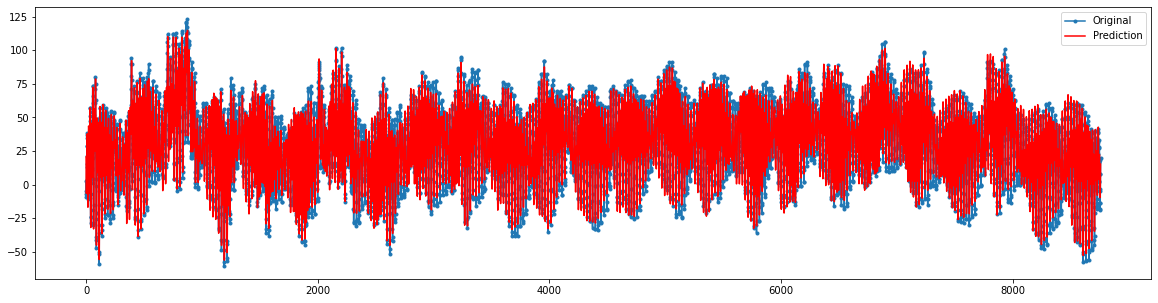

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(test_y, marker = '.', label='Original')
plt.plot(cnn_lstm_test_pred, color='red', label='Prediction')
plt.legend()